In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Data points
points = {
    'A': (0.05, -0.8),
    'B': (-1.0, 0.8),
    'C': (0.09, -0.08),
    'D': (-0.7, -0.75),
    'E': (-1.6, 1.5)
}

In [79]:
# Step 1: Calculate Euclidean distances manually
def euclidean_distance(p1, p2):
    return np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

# Create the distance matrix
labels = list(points.keys())
distances = np.zeros((len(labels), len(labels)))

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        if i != j:
            distances[i][j] = euclidean_distance(points[label1], points[label2])

# Display the distance matrix
print("Distance Matrix:")
print(distances)

# Step 2: Single Linkage Method
def single_linkage_clustering(dist_matrix, labels):
    clusters = [[i] for i in range(len(labels))]
    distances = dist_matrix.copy()
    linkage_matrix = []
    current_cluster_index = len(labels)

    while len(clusters) > 1:
        min_dist = np.inf
        to_merge = None

        # Find the two clusters with the smallest single-linkage distance
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        if distances[point1][point2] < min_dist:
                            min_dist = distances[point1][point2]
                            to_merge = (i, j)
        
        # Record the merge in the linkage matrix
        cluster1_idx = min(clusters[to_merge[0]])
        cluster2_idx = min(clusters[to_merge[1]])
        linkage_matrix.append([cluster1_idx, cluster2_idx, min_dist, len(clusters[to_merge[0]]) + len(clusters[to_merge[1]])])

        # Merge the clusters and assign a new index to the merged cluster
        clusters[to_merge[0]] = clusters[to_merge[0]] + clusters[to_merge[1]]
        del clusters[to_merge[1]]

        # Update the new cluster with a unique index
        for i in range(len(clusters[to_merge[0]])):
            clusters[to_merge[0]][i] = current_cluster_index
        current_cluster_index += 1

        print(f"Merged: {cluster1_idx} and {cluster2_idx} at distance {min_dist}")

    return linkage_matrix

# Step 3: Plot Dendrogram
def plot_dendrogram(linkage_matrix, method_name):
    fig, ax = plt.subplots()
    plt.title(f"Dendrogram ({method_name} Linkage)")
    
    # Convert linkage_matrix to numpy array
    linkage_matrix = np.array(linkage_matrix)
    
    dendrogram(linkage_matrix)
    plt.show()

# Single linkage clustering
linkage_single = single_linkage_clustering(distances, labels)
plot_dendrogram(linkage_single, "Single")

# Step 5: Maximum Linkage Method
def maximum_linkage_clustering(dist_matrix, labels):
    clusters = [[i] for i in range(len(labels))]
    distances = dist_matrix.copy()
    linkage_matrix = []
    current_cluster_index = len(labels)

    while len(clusters) > 1:
        max_dist = 0
        to_merge = None

        # Find the two clusters with the largest maximum-linkage distance
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        if distances[point1][point2] > max_dist:
                            max_dist = distances[point1][point2]
                            to_merge = (i, j)
        
        # Record the merge in the linkage matrix
        cluster1_idx = min(clusters[to_merge[0]])
        cluster2_idx = min(clusters[to_merge[1]])
        linkage_matrix.append([cluster1_idx, cluster2_idx, max_dist, len(clusters[to_merge[0]]) + len(clusters[to_merge[1]])])

        # Merge the clusters and assign a new index to the merged cluster
        clusters[to_merge[0]] = clusters[to_merge[0]] + clusters[to_merge[1]]
        del clusters[to_merge[1]]

        # Update the new cluster with a unique index
        for i in range(len(clusters[to_merge[0]])):
            clusters[to_merge[0]][i] = current_cluster_index
        current_cluster_index += 1

        print(f"Merged: {cluster1_idx} and {cluster2_idx} at distance {max_dist}")

    return linkage_matrix


Distance Matrix:
[[0.         1.91376592 0.72111026 0.75166482 2.83063597]
 [1.91376592 0.         1.40089257 1.57876534 0.92195445]
 [0.72111026 1.40089257 0.         1.03585713 2.31354706]
 [0.75166482 1.57876534 1.03585713 0.         2.42332416]
 [2.83063597 0.92195445 2.31354706 2.42332416 0.        ]]
Merged: 0 and 2 at distance 0.7211102550927979


IndexError: index 5 is out of bounds for axis 0 with size 5

Merged: [0] and [4] at distance 2.830635970943632
Merged: [0, 4] and [3] at distance 2.423324163210527
Merged: [0, 4, 3] and [2] at distance 2.3135470602518553
Merged: [0, 4, 3, 2] and [1] at distance 1.9137659209004638


ValueError: Linkage 'Z' uses the same cluster more than once.

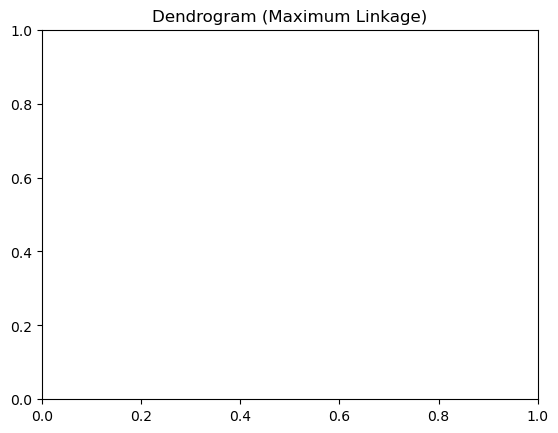

In [81]:
# Maximum linkage clustering
linkage_max = maximum_linkage_clustering(distances, labels)
plot_dendrogram(linkage_max, "Maximum")

# Compare single and maximum linkage
print("Single Linkage Matrix:", linkage_single)
print("Maximum Linkage Matrix:", linkage_max)


# Question 2 Part 2

# Distance

In [4]:
import numpy as np

# Data points
data_points = np.array([
    [1.0, 2.0],
    [2.0, 1.0],
    [3.0, 2.5],
    [5.0, 6.0],
    [6.0, 5.0],
    [7.0, 6.5]
])

# Means of the two Gaussian components
mu1 = np.array([2.0, 2.0])
mu2 = np.array([6.0, 6.0])

# Function to calculate squared Euclidean distance
def squared_distance(point, mean):
    return np.sum((point - mean) ** 2)

# Calculate squared distances for each data point from both means
distances_mu1 = [squared_distance(point, mu1) for point in data_points]
distances_mu2 = [squared_distance(point, mu2) for point in data_points]

# Display results
distances_mu1, distances_mu2


([1.0, 1.0, 1.25, 25.0, 25.0, 45.25], [41.0, 41.0, 21.25, 1.0, 1.0, 1.25])

# Function to calculate Gaussian PDF based on the squared distance

In [8]:
import numpy as np

# Function to calculate Gaussian PDF based on the squared distance
def gaussian_pdf(squared_distance):
    return np.exp(-0.5 * squared_distance)

# Squared distances to means (already computed earlier)
distances_mu1 = [1.0, 1.0, 1.25, 25.0, 25.0, 45.25]
distances_mu2 = [41.0, 41.0, 21.25, 1.0, 1.0, 1.25]

# Calculate Gaussian PDFs for each data point for both Gaussian components
pdf_mu1 = [gaussian_pdf(dist) for dist in distances_mu1]
pdf_mu2 = [gaussian_pdf(dist) for dist in distances_mu2]

# Display the Gaussian PDFs
pdf_mu1, pdf_mu2


([0.6065306597126334,
  0.6065306597126334,
  0.5352614285189903,
  3.726653172078671e-06,
  3.726653172078671e-06,
  1.493094676197164e-10],
 [1.2501528663867426e-09,
  1.2501528663867426e-09,
  2.430083125932946e-05,
  0.6065306597126334,
  0.6065306597126334,
  0.5352614285189903])

# Responsibilities

In [11]:
# Mixing proportions for both components
pi1, pi2 = 0.5, 0.5

# Responsibilities calculation using Gaussian PDFs
def responsibility(pdf1, pdf2):
    return (pi1 * pdf1) / (pi1 * pdf1 + pi2 * pdf2)

# Calculate responsibilities for each data point
responsibilities_mu1 = [responsibility(pdf1, pdf2) for pdf1, pdf2 in zip(pdf_mu1, pdf_mu2)]
responsibilities_mu2 = [1 - resp for resp in responsibilities_mu1]  # Complementary responsibilities

# Create a summary of responsibilities for each data point
responsibilities_summary = list(zip(data_points, responsibilities_mu1, responsibilities_mu2))

# Display the summary
responsibilities_summary


[(array([1., 2.]), 0.9999999979388464, 2.0611535811454473e-09),
 (array([2., 1.]), 0.9999999979388464, 2.0611535811454473e-09),
 (array([3. , 2.5]), 0.9999546021312975, 4.53978687025014e-05),
 (array([5., 6.]), 6.144174602214718e-06, 0.9999938558253978),
 (array([6., 5.]), 6.144174602214718e-06, 0.9999938558253978),
 (array([7. , 6.5]), 2.7894680920908113e-10, 0.9999999997210532)]

# Question 2 Part 3

In [14]:
import numpy as np

# Responsibilities for each component from the E-step
responsibilities_mu1 = np.array(responsibilities_mu1)
responsibilities_mu2 = np.array(responsibilities_mu2)

# Total number of data points
n = len(data_points)

# Update the means for both components
mu1_updated = np.sum([resp * point for resp, point in zip(responsibilities_mu1, data_points)], axis=0) / np.sum(responsibilities_mu1)
mu2_updated = np.sum([resp * point for resp, point in zip(responsibilities_mu2, data_points)], axis=0) / np.sum(responsibilities_mu2)

# Update the covariance matrices for both components
cov1_updated = np.sum([resp * np.outer((point - mu1_updated), (point - mu1_updated)) 
                      for resp, point in zip(responsibilities_mu1, data_points)], axis=0) / np.sum(responsibilities_mu1)

cov2_updated = np.sum([resp * np.outer((point - mu2_updated), (point - mu2_updated)) 
                      for resp, point in zip(responsibilities_mu2, data_points)], axis=0) / np.sum(responsibilities_mu2)

# Update the mixing proportions
pi1_updated = np.sum(responsibilities_mu1) / n
pi2_updated = np.sum(responsibilities_mu2) / n

(array([1.9999992 , 1.83333826]),
 array([5.99995664, 5.83328425]),
 array([[0.6667101 , 0.16670996],
        [0.16670996, 0.38894255]]),
 array([[0.66679348, 0.16681652],
        [0.16681652, 0.38905128]]),
 0.4999944811061903,
 0.5000055188938098)

In [16]:
mu1_updated

array([1.9999992 , 1.83333826])

In [18]:
mu2_updated

array([1.9999992 , 1.83333826])

In [20]:
cov1_updated

array([[0.6667101 , 0.16670996],
       [0.16670996, 0.38894255]])

In [22]:
cov2_updated

array([[0.66679348, 0.16681652],
       [0.16681652, 0.38905128]])

In [24]:
pi1_updated

0.4999944811061903

In [26]:
pi2_updated

0.5000055188938098

# Question 2 Part 4

In [45]:
import numpy as np

# Data points
data_points = np.array([
    [1.0, 2.0],
    [2.0, 1.0],
    [3.0, 2.5],
    [5.0, 6.0],
    [6.0, 5.0],
    [7.0, 6.5]
])

# Function to compute the Gaussian PDF based on mean and covariance matrix
def multivariate_gaussian(x, mean, cov):
    d = len(x)
    cov_inv = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    normalization_factor = 1 / np.sqrt((2 * np.pi)**d * det_cov)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, cov_inv), (x - mean))
    return normalization_factor * np.exp(exponent)

# E-step: Compute responsibilities
def e_step(data_points, mu1, mu2, cov1, cov2, pi1, pi2):
    responsibilities_mu1 = []
    responsibilities_mu2 = []
    
    for point in data_points:
        pdf_mu1 = multivariate_gaussian(point, mu1, cov1)
        pdf_mu2 = multivariate_gaussian(point, mu2, cov2)
        gamma_mu1 = (pi1 * pdf_mu1) / (pi1 * pdf_mu1 + pi2 * pdf_mu2)
        gamma_mu2 = 1 - gamma_mu1
        
        responsibilities_mu1.append(gamma_mu1)
        responsibilities_mu2.append(gamma_mu2)
    
    return np.array(responsibilities_mu1), np.array(responsibilities_mu2)

# M-step: Update the parameters
def m_step(data_points, responsibilities_mu1, responsibilities_mu2):
    n = len(data_points)
    
    # Update means
    mu1_updated = np.sum([resp * point for resp, point in zip(responsibilities_mu1, data_points)], axis=0) / np.sum(responsibilities_mu1)
    mu2_updated = np.sum([resp * point for resp, point in zip(responsibilities_mu2, data_points)], axis=0) / np.sum(responsibilities_mu2)
    
    # Update covariance matrices
    cov1_updated = np.sum([resp * np.outer((point - mu1_updated), (point - mu1_updated)) 
                          for resp, point in zip(responsibilities_mu1, data_points)], axis=0) / np.sum(responsibilities_mu1)
    
    cov2_updated = np.sum([resp * np.outer((point - mu2_updated), (point - mu2_updated)) 
                          for resp, point in zip(responsibilities_mu2, data_points)], axis=0) / np.sum(responsibilities_mu2)
    
    # Update mixing proportions
    pi1_updated = np.sum(responsibilities_mu1) / n
    pi2_updated = np.sum(responsibilities_mu2) / n
    
    return mu1_updated, mu2_updated, cov1_updated, cov2_updated, pi1_updated, pi2_updated

# Initial means, covariances, and mixing proportions from iteration 1
mu1 = np.array([1.9999992, 1.83333826])
mu2 = np.array([5.99995664, 5.83328425])
cov1 = np.array([[0.6667101, 0.16670996], [0.16670996, 0.38894255]])
cov2 = np.array([[0.66679348, 0.16681652], [0.16681652, 0.38905128]])
pi1 = 0.49999
pi2 = 0.50001

In [47]:
# Perform Iteration 2
responsibilities_mu1_2, responsibilities_mu2_2 = e_step(data_points, mu1, mu2, cov1, cov2, pi1, pi2)
mu1_2, mu2_2, cov1_2, cov2_2, pi1_2, pi2_2 = m_step(data_points, responsibilities_mu1_2, responsibilities_mu2_2)

In [49]:
results = {
    'Means (mu1, mu2)': (mu1_2, mu2_2),
    'Covariance Matrices (cov1, cov2)': (cov1_2, cov2_2),
    'Mixing Proportions (pi1, pi2)': (pi1_2, pi2_2)
}

print(results)

{'Means (mu1, mu2)': (array([1.99999995, 1.83333331]), array([5.99999978, 5.8333331 ])), 'Covariance Matrices (cov1, cov2)': (array([[0.66666674, 0.16666671],
       [0.16666671, 0.38888895]]), array([[0.66666727, 0.16666737],
       [0.16666737, 0.38888966]])), 'Mixing Proportions (pi1, pi2)': (0.49999996740145813, 0.5000000325985419)}


In [51]:
# Perform Iteration 3
responsibilities_mu1_3, responsibilities_mu2_3 = e_step(data_points, mu1_2, mu2_2, cov1_2, cov2_2, pi1_2, pi2_2)
mu1_3, mu2_3, cov1_3, cov2_3, pi1_3, pi2_3 = m_step(data_points, responsibilities_mu1_3, responsibilities_mu2_3)

In [53]:
# Results after Iteration 3
results = {
    'Means (mu1, mu2)': (mu1_3, mu2_3),
    'Covariance Matrices (cov1, cov2)': (cov1_3, cov2_3),
    'Mixing Proportions (pi1, pi2)': (pi1_3, pi2_3)
}

print(results)

{'Means (mu1, mu2)': (array([1.99999995, 1.83333331]), array([5.99999979, 5.8333331 ])), 'Covariance Matrices (cov1, cov2)': (array([[0.66666674, 0.16666671],
       [0.16666671, 0.38888895]]), array([[0.66666726, 0.16666737],
       [0.16666737, 0.38888965]])), 'Mixing Proportions (pi1, pi2)': (0.4999999676816928, 0.5000000323183071)}


# Question 2 Part 6

In [57]:
# Function to compute entropy for a given set of responsibilities
def compute_entropy(responsibilities):
    return -np.sum(responsibilities * np.log(responsibilities))

# Compute the entropy for each cluster in iteration 3
entropy_cluster_1 = compute_entropy(responsibilities_mu1_3)
entropy_cluster_2 = compute_entropy(responsibilities_mu2_3)

# Compute the total entropy
total_entropy = entropy_cluster_1 + entropy_cluster_2

# Display the entropies
entropy_cluster_1, entropy_cluster_2, total_entropy


(5.608787149082942e-07, 3.2978178714635715e-06, 3.858696586371865e-06)

# Question 2 Part 4

In [12]:
# Function to compute multivariate Gaussian
def gaussian(x, mu, cov):
    d = len(mu)
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    norm_factor = 1.0 / ((2 * np.pi) ** (d / 2) * np.sqrt(cov_det))
    exp_factor = np.exp(-0.5 * (x - mu).T @ cov_inv @ (x - mu))
    return norm_factor * exp_factor

In [32]:
def calculate_distances(data, mu1, mu2):
    distances = []
    for i, x in enumerate(data):
        dist1 = np.sum((x - mu1) ** 2)  # Squared Euclidean distance to Gaussian 1 mean
        dist2 = np.sum((x - mu2) ** 2)  # Squared Euclidean distance to Gaussian 2 mean
        distances.append([dist1, dist2])
        print(f"Data point {i + 1}: Squared distance to Gaussian 1 mean = {dist1}, Squared distance to Gaussian 2 mean = {dist2}")
    return np.array(distances)

In [34]:
# Function to calculate Gaussians for each point
def calculate_gaussians(data, mu1, mu2, cov1, cov2):
    gaussians = []
    for i, x in enumerate(data):
        g1 = gaussian(x, mu1, cov1)
        g2 = gaussian(x, mu2, cov2)
        gaussians.append([g1, g2])
        print(f"Data point {i + 1}: Gaussian 1 = {g1}, Gaussian 2 = {g2}")
    return np.array(gaussians)

In [36]:
# E-step: Compute responsibilities
def e_step(data, mu1, mu2, cov1, cov2, pi1, pi2):
    responsibilities = []
    for i, x in enumerate(data):
        # Gaussian 1
        p1 = pi1 * gaussian(x, mu1, cov1)
        # Gaussian 2
        p2 = pi2 * gaussian(x, mu2, cov2)
        # Responsibilities
        r1 = p1 / (p1 + p2)
        r2 = p2 / (p1 + p2)
        responsibilities.append([r1, r2])
        print(f"Data point {i + 1}: Responsibility for Gaussian 1 = {r1}, Responsibility for Gaussian 2 = {r2}")
    return np.array(responsibilities)

In [38]:
# M-step: Update means, covariances, and mixing proportions
def m_step(data, responsibilities):
    # Update means
    r1_sum = np.sum(responsibilities[:, 0])
    r2_sum = np.sum(responsibilities[:, 1])
    
    mu1_new = np.sum(responsibilities[:, 0, np.newaxis] * data, axis=0) / r1_sum
    mu2_new = np.sum(responsibilities[:, 1, np.newaxis] * data, axis=0) / r2_sum

    # Update covariances
    cov1_new = np.zeros((2, 2))
    cov2_new = np.zeros((2, 2))
    
    for i in range(len(data)):
        cov1_new += responsibilities[i, 0] * np.outer(data[i] - mu1_new, data[i] - mu1_new)
        cov2_new += responsibilities[i, 1] * np.outer(data[i] - mu2_new, data[i] - mu2_new)
    
    cov1_new /= r1_sum
    cov2_new /= r2_sum

    # Update mixing proportions
    pi1_new = r1_sum / len(data)
    pi2_new = r2_sum / len(data)

    print(f"Updated mean for Gaussian 1: {mu1_new}, Updated mean for Gaussian 2: {mu2_new}")
    print(f"Updated covariance for Gaussian 1: {cov1_new}, Updated covariance for Gaussian 2: {cov2_new}")
    print(f"Updated mixing proportion for Gaussian 1: {pi1_new}, Updated mixing proportion for Gaussian 2: {pi2_new}")

    return mu1_new, mu2_new, cov1_new, cov2_new, pi1_new, pi2_new

In [40]:
# Modified GMM with distance, Gaussian, and responsibility calculations for each iteration
def gmm_em_detailed_iterations(data, mu1, mu2, cov1, cov2, pi1, pi2, iterations=3):
    detailed_output = []
    
    for iteration in range(iterations):
        print(f"\nIteration {iteration + 1}")
        # E-step: Calculate distances, Gaussians, and responsibilities
        distances = calculate_distances(data, mu1, mu2)
        gaussians = calculate_gaussians(data, mu1, mu2, cov1, cov2)
        responsibilities = e_step(data, mu1, mu2, cov1, cov2, pi1, pi2)
        
        # Save details for each iteration
        for i in range(len(data)):
            detailed_output.append({
                "Iteration": iteration + 1,
                "Data Point": i + 1,
                "Distance (Gaussian 1)": distances[i, 0],
                "Distance (Gaussian 2)": distances[i, 1],
                "Gaussian (Gaussian 1)": gaussians[i, 0],
                "Gaussian (Gaussian 2)": gaussians[i, 1],
                "Responsibility (Gaussian 1)": responsibilities[i, 0],
                "Responsibility (Gaussian 2)": responsibilities[i, 1],
                "Mean (Gaussian 1)": mu1,
                "Mean (Gaussian 2)": mu2,
                "Covariance (Gaussian 1)": cov1,
                "Covariance (Gaussian 2)": cov2,
                "Mixing Proportion (Gaussian 1)": pi1,
                "Mixing Proportion (Gaussian 2)": pi2
            })
        
        # M-step: Update parameters
        mu1, mu2, cov1, cov2, pi1, pi2 = m_step(data, responsibilities)
    
    df_detailed_output = pd.DataFrame(detailed_output)
    return df_detailed_output

In [42]:
# Initial parameters for GMM
mu1_init = np.array([2.0, 2.0])  # Initial mean for Gaussian 1
mu2_init = np.array([6.0, 6.0])  # Initial mean for Gaussian 2
cov1_init = np.eye(2)  # Initial covariance for Gaussian 1
cov2_init = np.eye(2)  # Initial covariance for Gaussian 2
pi1_init = 0.5  # Initial mixing proportion for Gaussian 1
pi2_init = 0.5  # Initial mixing proportion for Gaussian 2
import numpy as np
import pandas as pd

# Data points
data = np.array([[1.0, 2.0],
                 [2.0, 1.0],
                 [3.0, 2.5],
                 [5.0, 6.0],
                 [6.0, 5.0],
                 [7.0, 6.5]])

In [44]:
# Perform GMM with detailed outputs for 3 iterations
df_detailed_final_output = gmm_em_detailed_iterations(data, mu1_init, mu2_init, cov1_init, cov2_init, pi1_init, pi2_init, iterations=3)


Iteration 1
Data point 1: Squared distance to Gaussian 1 mean = 1.0, Squared distance to Gaussian 2 mean = 41.0
Data point 2: Squared distance to Gaussian 1 mean = 1.0, Squared distance to Gaussian 2 mean = 41.0
Data point 3: Squared distance to Gaussian 1 mean = 1.25, Squared distance to Gaussian 2 mean = 21.25
Data point 4: Squared distance to Gaussian 1 mean = 25.0, Squared distance to Gaussian 2 mean = 1.0
Data point 5: Squared distance to Gaussian 1 mean = 25.0, Squared distance to Gaussian 2 mean = 1.0
Data point 6: Squared distance to Gaussian 1 mean = 45.25, Squared distance to Gaussian 2 mean = 1.25
Data point 1: Gaussian 1 = 0.09653235263005391, Gaussian 2 = 1.9896800830595185e-10
Data point 2: Gaussian 1 = 0.09653235263005391, Gaussian 2 = 1.9896800830595185e-10
Data point 3: Gaussian 1 = 0.0851895021952265, Gaussian 2 = 3.867597416164332e-06
Data point 4: Gaussian 1 = 5.931152735254121e-07, Gaussian 2 = 0.09653235263005391
Data point 5: Gaussian 1 = 5.931152735254121e-07, 

In [48]:
# Display the detailed output after all iterations
dataframe = df_detailed_final_output

In [50]:
dataframe[dataframe['Iteration'] == 1]

,Iteration,Data Point,Distance (Gaussian 1),Distance (Gaussian 2),Gaussian (Gaussian 1),Gaussian (Gaussian 2),Responsibility (Gaussian 1),Responsibility (Gaussian 2),Mean (Gaussian 1),Mean (Gaussian 2),Covariance (Gaussian 1),Covariance (Gaussian 2),Mixing Proportion (Gaussian 1),Mixing Proportion (Gaussian 2)
0,1,1,1.00,41.00,9.653235e-02,1.989680e-10,1.000000e+00,2.061154e-09,"[2.0, 2.0]","[6.0, 6.0]","[[1.0, 0.0], [0.0, 1.0]]","[[1.0, 0.0], [0.0, 1.0]]",0.5,0.5
1,1,2,1.00,41.00,9.653235e-02,1.989680e-10,1.000000e+00,2.061154e-09,"[2.0, 2.0]","[6.0, 6.0]","[[1.0, 0.0], [0.0, 1.0]]","[[1.0, 0.0], [0.0, 1.0]]",0.5,0.5
2,1,3,1.25,21.25,8.518950e-02,3.867597e-06,9.999546e-01,4.539787e-05,"[2.0, 2.0]","[6.0, 6.0]","[[1.0, 0.0], [0.0, 1.0]]","[[1.0, 0.0], [0.0, 1.0]]",0.5,0.5
3,1,4,25.00,1.00,5.931153e-07,9.653235e-02,6.144175e-06,9.999939e-01,"[2.0, 2.0]","[6.0, 6.0]","[[1.0, 0.0], [0.0, 1.0]]","[[1.0, 0.0], [0.0, 1.0]]",0.5,0.5
4,1,5,25.00,1.00,5.931153e-07,9.653235e-02,6.144175e-06,9.999939e-01,"[2.0, 2.0]","[6.0, 6.0]","[[1.0, 0.0], [0.0, 1.0]]","[[1.0, 0.0], [0.0, 1.0]]",0.5,0.5
5,1,6,45.25,1.25,2.376334e-11,8.518950e-02,2.789468e-10,1.000000e+00,"[2.0, 2.0]","[6.0, 6.0]","[[1.0, 0.0], [0.0, 1.0]]","[[1.0, 0.0], [0.0, 1.0]]",0.5,0.5


In [52]:
dataframe[dataframe['Iteration'] == 2]

,Iteration,Data Point,Distance (Gaussian 1),Distance (Gaussian 2),Gaussian (Gaussian 1),Gaussian (Gaussian 2),Responsibility (Gaussian 1),Responsibility (Gaussian 2),Mean (Gaussian 1),Mean (Gaussian 2),Covariance (Gaussian 1),Covariance (Gaussian 2),Mixing Proportion (Gaussian 1),Mixing Proportion (Gaussian 2)
6,2,1,1.027775,39.693635,1.216863e-01,1.616926e-13,1.000000e+00,1.328796e-12,"[1.999999204927691, 1.8333382649579235]","[5.999956644391604, 5.833284251154457]","[[0.6667100961401026, 0.16670996344663772], [0...","[[0.6667934784861594, 0.16681651721489185], [0...",0.499994,0.500006
7,2,2,0.694453,39.360290,1.216942e-01,1.334946e-15,1.000000e+00,1.096992e-14,"[1.999999204927691, 1.8333382649579235]","[5.999956644391604, 5.833284251154457]","[[0.6667100961401026, 0.16670996344663772], [0...","[[0.6667934784861594, 0.16681651721489185], [0...",0.499994,0.500006
8,2,3,1.444439,20.110524,1.217002e-01,2.618376e-08,9.999998e-01,2.151544e-07,"[1.999999204927691, 1.8333382649579235]","[5.999956644391604, 5.833284251154457]","[[0.6667100961401026, 0.16670996344663772], [0...","[[0.6667934784861594, 0.16681651721489185], [0...",0.499994,0.500006
9,2,4,26.361075,1.027707,1.945868e-11,1.216674e-01,1.599298e-10,1.000000e+00,"[1.999999204927691, 1.8333382649579235]","[5.999956644391604, 5.833284251154457]","[[0.6667100961401026, 0.16670996344663772], [0...","[[0.6667934784861594, 0.16681651721489185], [0...",0.499994,0.500006
10,2,5,26.027753,0.694363,2.362294e-09,1.217098e-01,1.940880e-08,1.000000e+00,"[1.999999204927691, 1.8333382649579235]","[5.999956644391604, 5.833284251154457]","[[0.6667100961401026, 0.16670996344663772], [0...","[[0.6667934784861594, 0.16681651721489185], [0...",0.499994,0.500006
11,2,6,46.777740,1.444597,1.197660e-16,1.217033e-01,9.840601e-16,1.000000e+00,"[1.999999204927691, 1.8333382649579235]","[5.999956644391604, 5.833284251154457]","[[0.6667100961401026, 0.16670996344663772], [0...","[[0.6667934784861594, 0.16681651721489185], [0...",0.499994,0.500006


In [54]:
dataframe[dataframe['Iteration'] == 3]

,Iteration,Data Point,Distance (Gaussian 1),Distance (Gaussian 2),Gaussian (Gaussian 1),Gaussian (Gaussian 2),Responsibility (Gaussian 1),Responsibility (Gaussian 2),Mean (Gaussian 1),Mean (Gaussian 2),Covariance (Gaussian 1),Covariance (Gaussian 2),Mixing Proportion (Gaussian 1),Mixing Proportion (Gaussian 2)
12,3,1,1.027778,39.694441,1.216935e-01,1.595870e-13,1.000000e+00,1.311385e-12,"[1.9999999543206342, 1.8333333062303618]","[5.999999784896689, 5.83333309965363]","[[0.6666667424052608, 0.1666667123352384], [0....","[[0.6666672686238369, 0.1666673729994205], [0....",0.5,0.5
13,3,2,0.694444,39.361107,1.216935e-01,1.313381e-15,1.000000e+00,1.079253e-14,"[1.9999999543206342, 1.8333333062303618]","[5.999999784896689, 5.83333309965363]","[[0.6666667424052608, 0.1666667123352384], [0....","[[0.6666672686238369, 0.1666673729994205], [0....",0.5,0.5
14,3,3,1.444445,20.111108,1.216935e-01,2.597293e-08,9.999998e-01,2.134290e-07,"[1.9999999543206342, 1.8333333062303618]","[5.999999784896689, 5.83333309965363]","[[0.6666667424052608, 0.1666667123352384], [0....","[[0.6666672686238369, 0.1666673729994205], [0....",0.5,0.5
15,3,4,26.361112,1.027777,1.939034e-11,1.216934e-01,1.593376e-10,1.000000e+00,"[1.9999999543206342, 1.8333333062303618]","[5.999999784896689, 5.83333309965363]","[[0.6666667424052608, 0.1666667123352384], [0....","[[0.6666672686238369, 0.1666673729994205], [0....",0.5,0.5
16,3,5,26.027778,0.694444,2.356127e-09,1.216936e-01,1.936114e-08,1.000000e+00,"[1.9999999543206342, 1.8333333062303618]","[5.999999784896689, 5.83333309965363]","[[0.6666667424052608, 0.1666667123352384], [0....","[[0.6666672686238369, 0.1666673729994205], [0....",0.5,0.5
17,3,6,46.777778,1.444445,1.191386e-16,1.216936e-01,9.790049e-16,1.000000e+00,"[1.9999999543206342, 1.8333333062303618]","[5.999999784896689, 5.83333309965363]","[[0.6666667424052608, 0.1666667123352384], [0....","[[0.6666672686238369, 0.1666673729994205], [0....",0.5,0.5
